<a href="https://colab.research.google.com/github/ChamodP/ML_Assignment_01/blob/main/AS2019503_KNN_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **K-nearest neighbour algorithm**

In [33]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [34]:
#loading the dataset
from google.colab import files
uploaded = files.upload()

Saving Mobile_Dataset.csv to Mobile_Dataset (1).csv


In [35]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Mobile_Dataset.csv']))

In [36]:
#viewing the dataset
print ("Dataset shape  = ", dataset.shape)
print("")
dataset.head()


Dataset shape  =  (2000, 21)



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


 **Remove unnecessary values**

In [37]:
(dataset['sc_w'] == 0).sum() #can be happen?

180

In [38]:
(dataset['px_height'] == 0).sum() #can be happen?

2

In [39]:
#removing zero values containing rows in column screen width,px_height
dataset= dataset[dataset['sc_w'] != 0]
dataset= dataset[dataset['px_height'] != 0]

In [40]:
# no zero values in 'sc_w'
(dataset['sc_w'] == 0).sum()

0

In [41]:
# no zero values in px_height
(dataset['px_height'] == 0).sum()

0

In [42]:
#rows are reduced to 1819
print ("Dataset shape  = ", dataset.shape)
print("")
dataset

Dataset shape  =  (1819, 21)



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [43]:
#checking for null values
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [44]:
#checking whether dataset is balanced
print("checking whether dataset is balanced")
print(dataset.price_range.value_counts())
#dataset is balanced 

checking whether dataset is balanced
3    461
2    456
1    451
0    451
Name: price_range, dtype: int64


In [45]:
# scaler = MinMaxScaler()
# for column in dataset.columns:
#     if column != 'price_range':
#       dataset[column] = scaler.fit_transform(dataset[column].values.reshape(-1,1))
# dataset
# #accuracy reduces 


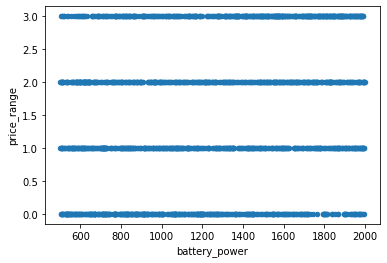

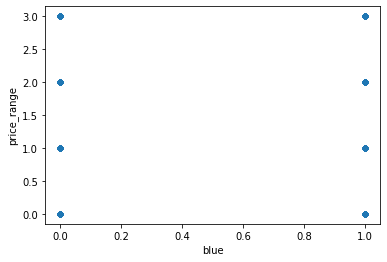

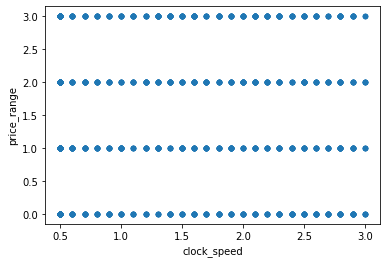

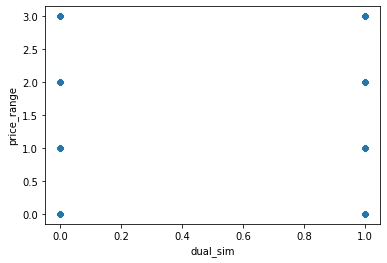

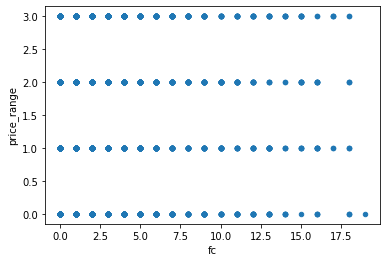

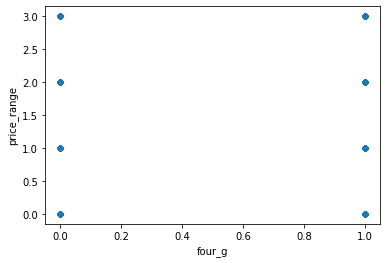

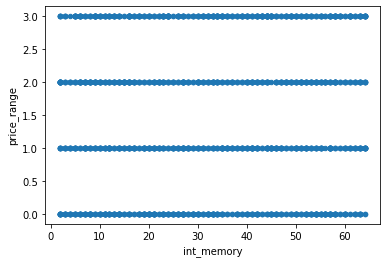

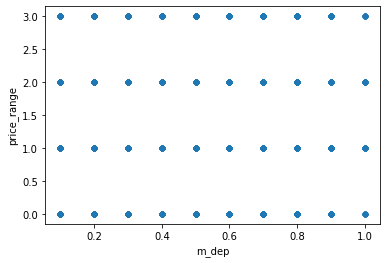

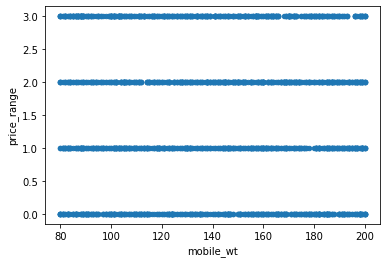

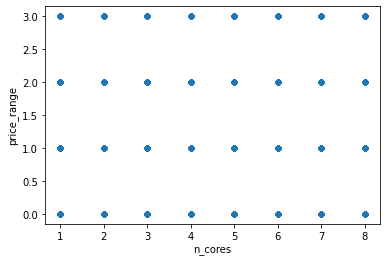

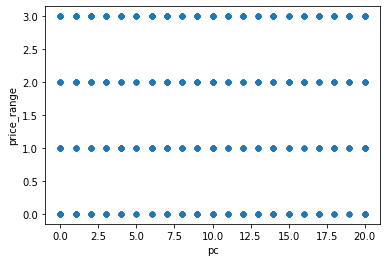

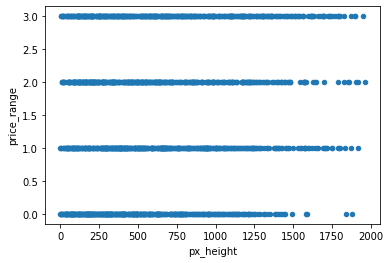

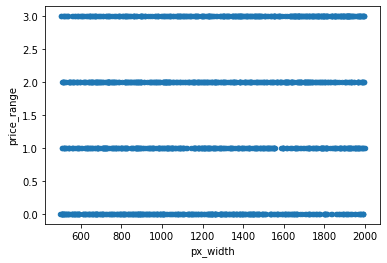

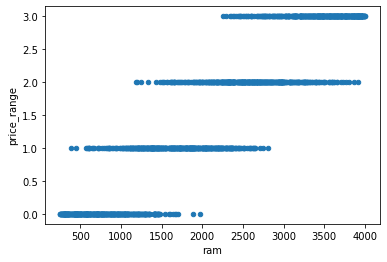

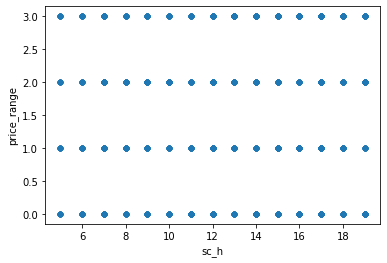

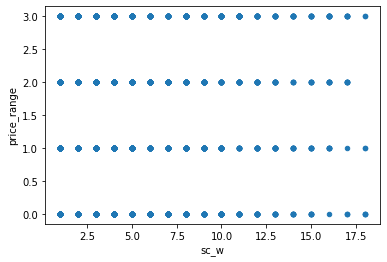

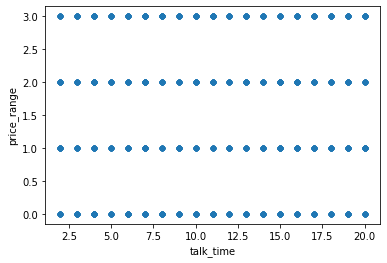

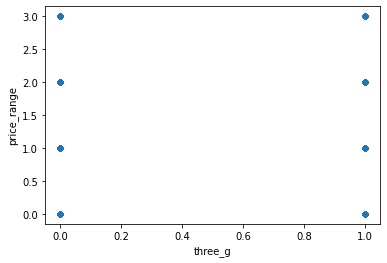

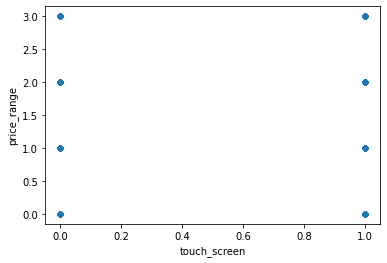

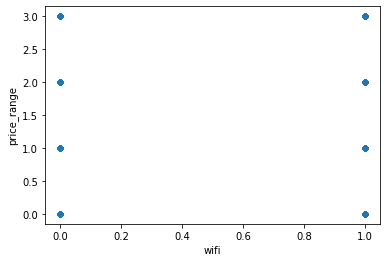

In [46]:
for column in dataset.columns:
  if column != 'price_range':
    dataset.plot(kind = 'scatter', x = column, y = 'price_range')
    plt.show()

In [47]:
#lets seperate features and target values 
y = dataset['price_range']
x = dataset.drop(['price_range'], axis=1)

In [48]:
print ("x_train shape  = ", x.shape, )
print ("x_test shape   = ", y.shape,)

x_train shape  =  (1819, 20)
x_test shape   =  (1819,)


In [49]:
#lets split the dataset in to training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.20, random_state=21, stratify=y) 


In [50]:
#checking 
print ("X_train shape  = ", x_train.shape, "\ny_train shape  = ", y_train.shape)
print ("\nX_test shape   = ", x_test.shape, "\ny_test shape   = ", y_test.shape)


X_train shape  =  (1455, 20) 
y_train shape  =  (1455,)

X_test shape   =  (364, 20) 
y_test shape   =  (364,)


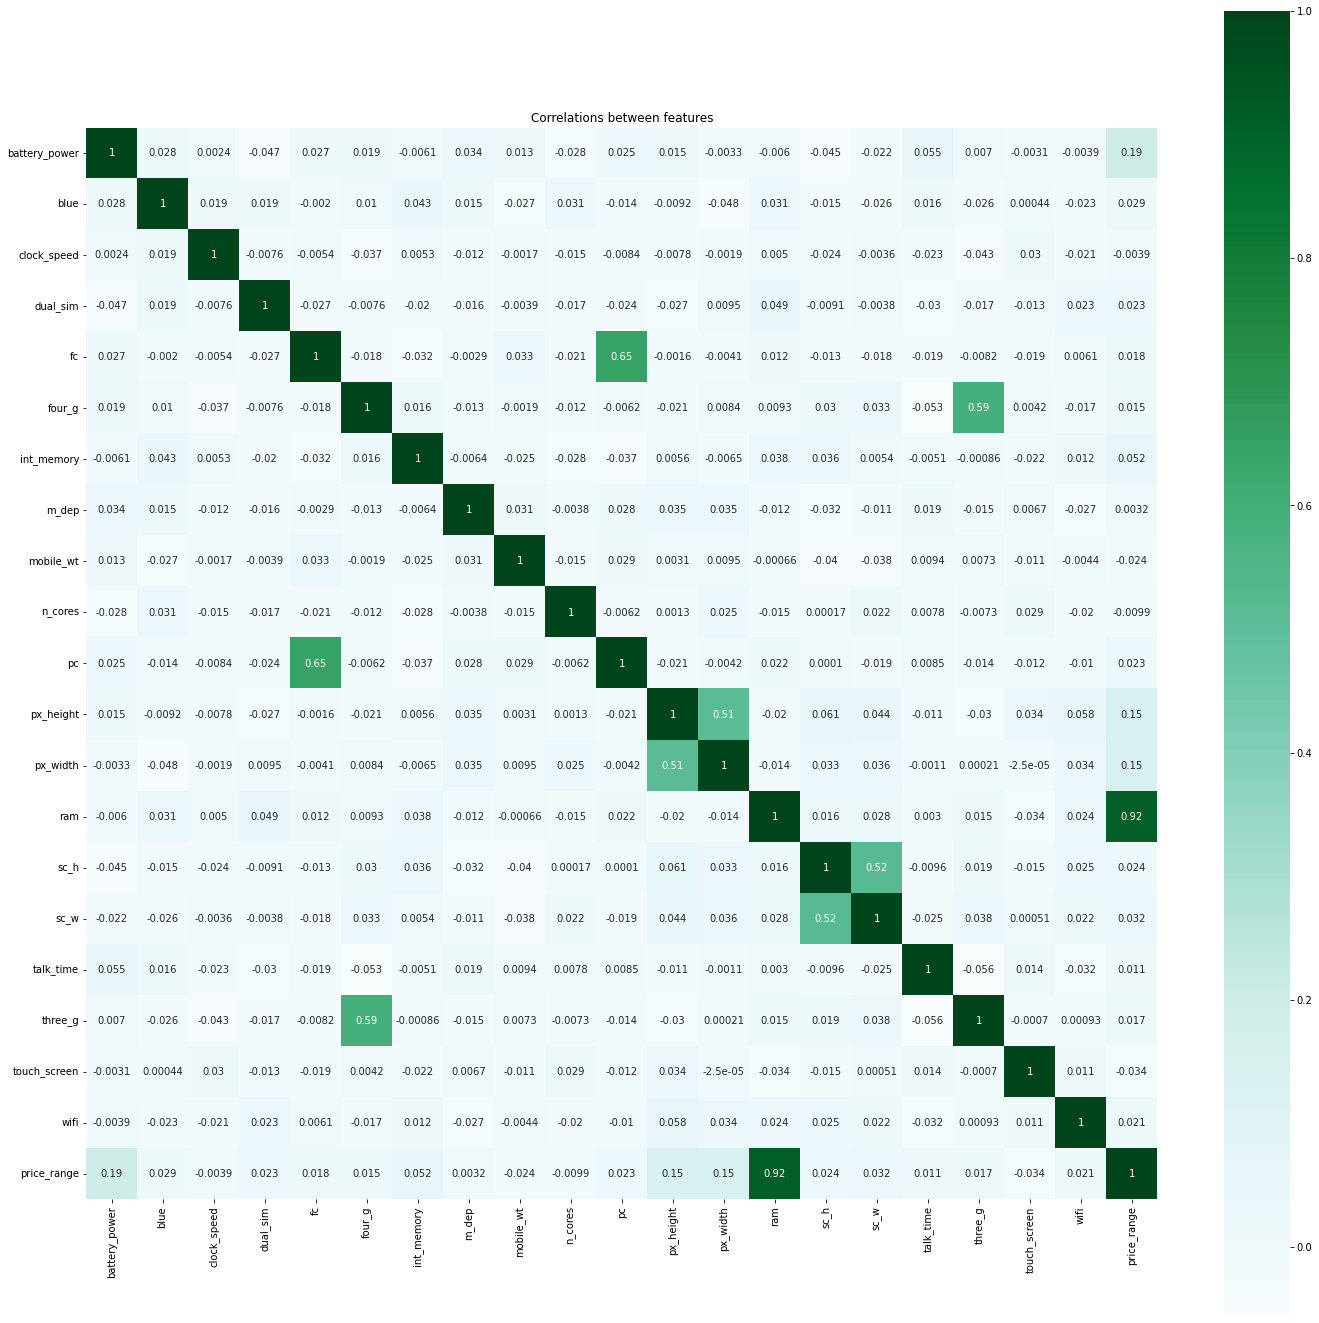

In [51]:
#lets see correlation between features and targets  
fig = plt.subplots (figsize = (24,24))
sns.heatmap(dataset.corr (), square = True, cbar = True, annot = True, cmap="BuGn", annot_kws = {'size': 10})
plt.title('Correlations between features')
plt.show ()

**Feature Extraction**??????

In [52]:
# cor_target = abs(corr["price_range"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.02]
# relevant_features


In [53]:
# columns = ['battery_power', 'blue','dual_sim', 'int_memory', 'mobile_wt','pc', 'sc_h', 'sc_w', 'touch_screen', 'wifi', 'px_height','px_width','ram','price_range'];
# selected_columns = df1[columns]
# dataset2 = selected_columns.copy()
# dataset2

what to do for the rams relationship with price???

In [54]:
# Create KNN classifier
knn_first = KNeighborsClassifier(n_neighbors=3)  
# Fit the classifier to the data
knn_first.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [55]:
knn_first.score(x_test, y_test)

0.9148351648351648

In [56]:
#first prediction of targets
y_pred1 = knn_first.predict(x_test)

In [57]:
#confusion matrix
print(sm.confusion_matrix(y_test, y_pred1)) 
print(sm.classification_report(y_test,y_pred1))

[[87  3  0  0]
 [ 7 79  4  0]
 [ 0  2 83  6]
 [ 0  0  9 84]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        90
           1       0.94      0.88      0.91        90
           2       0.86      0.91      0.89        91
           3       0.93      0.90      0.92        93

    accuracy                           0.91       364
   macro avg       0.92      0.91      0.91       364
weighted avg       0.92      0.91      0.91       364



In [58]:
from sklearn.model_selection import cross_val_score
# creating odd list of K for KNN
neighbors = list(range(1, 30, 2))
print("neighbors= ", neighbors)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)

    # scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')
    # cv_scores.append(scores.mean())  

    knn.fit(x_train, y_train)
    cv_scores.append(knn.score(x_test, y_test))  



neighbors=  [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


In [59]:
cv_scores

[0.8708791208791209,
 0.9148351648351648,
 0.9120879120879121,
 0.9230769230769231,
 0.9230769230769231,
 0.9313186813186813,
 0.9285714285714286,
 0.9203296703296703,
 0.9230769230769231,
 0.9285714285714286,
 0.9175824175824175,
 0.9148351648351648,
 0.9203296703296703,
 0.9175824175824175,
 0.9120879120879121]

In [60]:
print(max(cv_scores))


0.9313186813186813


The optimal number of neighbors is 11


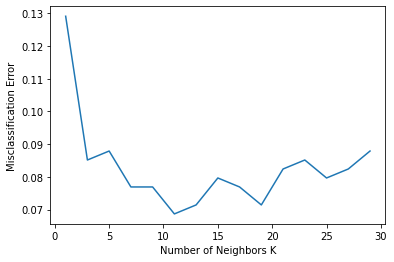

In [61]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [62]:
#trying optimum K

# Create KNN classifier
knn_last = KNeighborsClassifier(n_neighbors=11)
# Fit the classifier to the data
knn_last.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [63]:
knn_last.score(x_test, y_test)

0.9313186813186813

### **MLP**

In [64]:
# Data Preproccessing
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np # linear algebra

In [65]:
#loading the dataset
from google.colab import files
uploaded = files.upload()

Saving Mobile_Dataset.csv to Mobile_Dataset (2).csv


In [66]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Mobile_Dataset.csv']))

In [67]:
#viewing the dataset
dataset.shape

(2000, 21)

In [68]:
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [69]:
(dataset['sc_w'] == 0).sum() #can be happen?

180

In [70]:
(dataset['px_height'] == 0).sum() #can be happen?

2

In [71]:
#removing zero values containing rows in column screen width,px_height
dataset= dataset[dataset['sc_w'] != 0]
dataset= dataset[dataset['px_height'] != 0]

In [72]:
# no zero values in 'sc_w'
(dataset['sc_w'] == 0).sum()

0

In [73]:
# no zero values in px_height
(dataset['px_height'] == 0).sum()

0

In [74]:
#rows are reduced to 1819
print ("Dataset shape  = ", dataset.shape)
print("")
dataset

Dataset shape  =  (1819, 21)



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [75]:
#Changing pandas dataframe to numpy array
x = dataset.iloc[:,:20].values
y = dataset.iloc[:,20:21].values

print ("x  = ", x.shape, )
print ("y  = ", y.shape,)

x  =  (1819, 20)
y  =  (1819, 1)


In [76]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# #Normalizing the data
# from sklearn.preprocessing import MinMaxScaler
# min = MinMaxScaler()
# x = min.fit_transform(x)

In [77]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder = OneHotEncoder()
y = OneHotEncoder.fit_transform(y).toarray()

In [78]:
#Dividing dataset to training and testing
seed = 21
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=seed, stratify=y)

print ("X_train shape  = ", X_train.shape, "\ny_train shape  = ", y_train.shape)
print ("\nX_test shape   = ", X_test.shape, "\ny_test shape   = ", y_test.shape)

X_train shape  =  (1455, 20) 
y_train shape  =  (1455, 4)

X_test shape   =  (364, 20) 
y_test shape   =  (364, 4)


In [79]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense

# Neural network
#MLP - one hidden layer ( neurons) + Softmax layer (4 classes)
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(20,)))
model.add(Dense(4, activation='softmax'))

In [80]:
OPTIMIZER = keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [81]:
history = model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 1.5090 - accuracy: 0.3546 - val_loss: 1.3372 - val_accuracy: 0.3462
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 1.1958 - accuracy: 0.4742 - val_loss: 1.1413 - val_accuracy: 0.5027
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 1.0039 - accuracy: 0.5746 - val_loss: 0.9663 - val_accuracy: 0.5769
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.8513 - accuracy: 0.6564 - val_loss: 0.8256 - val_accuracy: 0.6648
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7354 - accuracy: 0.7265 - val_loss: 0.7200 - val_accuracy: 0.7115
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.7794 - val_loss: 0.6421 - val_accuracy: 0.7473
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5837 - accuracy: 0.8179 - val_loss: 0.5821 - val_accuracy: 0.8077
Epoch 8/100


In [82]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

12/12 [==============================] - 0s 1ms/step


In [83]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 95.87912087912088


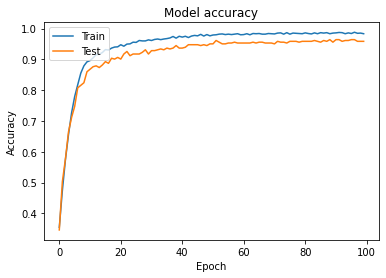

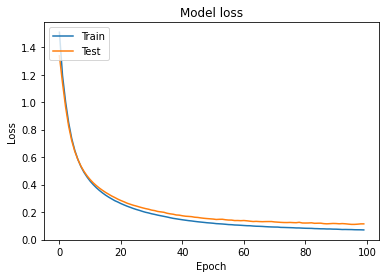

In [84]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

compare two models

In [85]:
json_string = model.to_json() # as json 
open('mlp_mnist_v1_model.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mlp_mnist_v1_wts.h5')

In [86]:
from keras.models import model_from_json
model1 = model_from_json(open('mlp_mnist_v1_model.json').read())
model1.load_weights('mlp_mnist_v1_wts.h5')
model1.summary()
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
score = model1.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1]*100)

y_probability = model.predict(X_test)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
Total params: 204
Trainable params: 204
Non-trainable params: 0
_________________________________________________________________
Test score: 0.11411676555871964
Test accuracy: 95.8791196346283
12/12 [==============================] - 0s 1ms/step
True class =  [1. 0. 0. 0.] Predicted class =  0


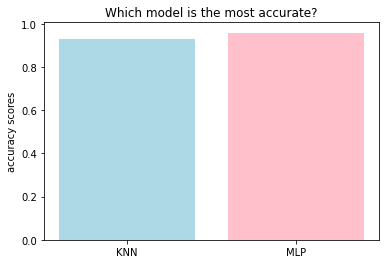

In [88]:
models = ['KNN','MLP']
acc_scores = [0.9313186813186813, 0.9587967032967034]

plt.bar(models, acc_scores, color=['lightblue', 'pink'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()